<a href="https://colab.research.google.com/github/andraroman12/PMP-2024/blob/main/Lab07/lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Output()

Output()

Intervalul de incredere (HDI 95%) pentru mu: <bound method Mapping.values of <xarray.Dataset> Size: 64B
Dimensions:  (hdi: 2)
Coordinates:
  * hdi      (hdi) <U6 48B 'lower' 'higher'
Data variables:
    mu       (hdi) float64 16B 56.46 59.48>
Intervalul de incredere (HDI 95%) pentru sigma: <bound method Mapping.values of <xarray.Dataset> Size: 64B
Dimensions:  (hdi: 2)
Coordinates:
  * hdi      (hdi) <U6 48B 'lower' 'higher'
Data variables:
    sigma    (hdi) float64 16B 1.265 3.696>


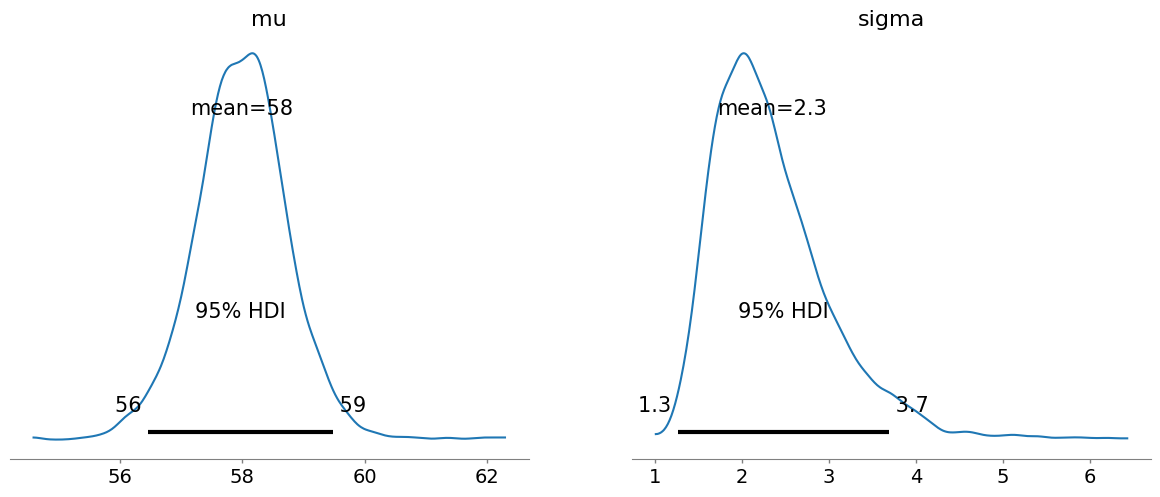

In [5]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

observatii = [56, 60, 58, 55, 57, 59, 61, 56, 58, 60]

x = np.mean(observatii)

#modelului Bayesian
with pm.Model() as model:
    #calculez mu si sigma
    mu = pm.Normal("mu", mu=x, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)

    likelihood = pm.Normal("X", mu=mu, sigma=sigma, observed=data)

    #procesul de esantionare
    trace=pm.sample(2000, tune=1000,target_accept=0.95,return_inferencedata=True)

#calculez intervalele HDI de 95% pentru mu și sigma
hdi_mu = pm.hdi(trace.posterior['mu'], hdi_prob=0.95)
hdi_sigma = pm.hdi(trace.posterior['sigma'], hdi_prob=0.95)

print("Intervalul de incredere (HDI 95%) pentru mu:", hdi_mu.values)
print("Intervalul de incredere (HDI 95%) pentru sigma:", hdi_sigma.values)

az.plot_posterior(trace, var_names=["mu", "sigma"], hdi_prob=0.95)
plt.show()
